# Regularisation

Regularization is a set of techniques that improve models by **reducing the risk of overfitting**. They thus improve the generalizability of the model!


| method | description |
|:-------:|:-----------:|
| Ridge Regression (L2) | penalizes the square of coefficients | 
| Lasso (L1) | penalizes the absolute coefficients | 
| ElasticNet (L1 + L2) | weighted combination of Ridge and Lasso | 
| sklearn.linear_model.Ridge | linear regressor using L2 | 
| sklearn.linear_model.Lasso | linear regressor using L1 | 
| sklearn.linear_model.ElasticNet | linear regressor using L1 + L2 |

- It is a tool that tackles overfitting!

- Solves problem of linear relationships between our input features.

- It operates on the coefficients!

## The Bias-Variance tradeoff

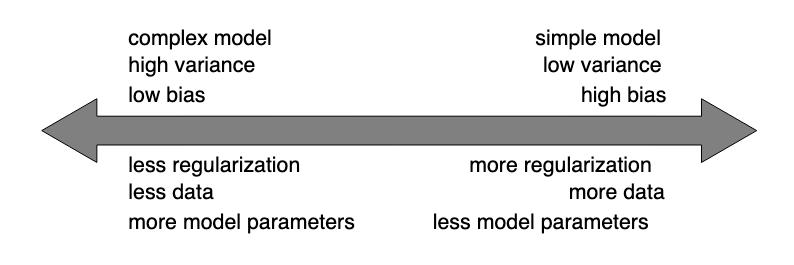

**Bias** is the **expected error created by a model** to approximate a real-world relationship.

**Variance** is the **amount** by which our **model would change with a different training dataset**. It is the **“flexibility” of our model, balanced against the bias**.

## Regularisation Types

We try to **minimise the mean square error** as a function of our model parameters - but **in regularisation we add an additional term to this - R**!

\begin{align}
 min(MSE(\vec{w}) + R
\end{align}

**R is affected by the 3 types of regularisation**. The 3 main types of regularisation on regular models are:

### 1. L2-Norm / Ridge Regression

**Ridge Regression** penalizes the **coefficients** of linear models. The penalty is proportional to the square of the parameter value. This leads to parameters with smaller absolute values.

\begin{align}
MSE + \alpha \sum_j^p{\hat{w_j}^2}
\end{align}

Where **hyperparameter alpha is the regularisation strength!**
- alpha controls how strong the regularization is (low alpha = little regularization, high alpha = very strong regularization)

The penalty is also called **L2-Norm (Euclidean Norm)**, because it can be written as:

\begin{align}
\left||L2 |\right| = \sqrt{x_1^2 + x_2^2 + x_3^2}
\end{align}

**For L2 norms to work, the data must be scaled!**

**Ridge Regression is the first type of regularization you should try.**

e.g. Let's set alpha to zero 
- big coefficients matter more because w is scared - acts as a penalty on the big coefficients
- smaller coefficients are better than bigger ones because we are trying to minimise this whole thing!

**MORE REGULARISATION MAKES OUR MODEL SIMPLER** - e.g. with a polynomial it will change it to a sinusoidal type wave to more of a straight line.

### 2. L1-Norm / Lasso Regression

**Lasso** penalizes the abslute values of coefficients. It uses the **L1 norm (Manhattan Norm)**. This pushes some coefficients down to zero.

\begin{align}
\left||L1 |\right| = \alpha \sum_j^p{|w_j|}
\end{align}

The hyperparameter alpha is the regularization strength. **The higher it is, the more coefficients will become zero.**

Therefore, **Lasso can be used for Automatic Feature Selection.**

Here we take the absolute of the coefficients - we are penalising the coefficients in general so it will eliminate some coefficients!

### 3. Elastic Net

Elastic Net combines Ridge and Lasso. The additional hyperparameter rho determines the proportion between both types.

\begin{align}
MSE + \alpha \rho \left||w |\right|_1 + \frac{\alpha(1-\rho)}{2}\left||w |\right|_2^2
\end{align}

or, more generally:

\begin{align}
L1 + \rho  .  L2
\end{align}            
            

- It uses 90% of the L2-Norm and 10% of L1-Norm - **${\rho}$ is a balancing factor!**

We can add these to practically any linear model!

### Exercise
- Plot the training and test score for the cancer dataset for a range of regularization strengths (using L2, L1 or ElasticNet).

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(True)

m = LogisticRegression()

In [2]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [3]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((426, 30), (143, 30), (426,), (143,))

In [4]:
m.fit(Xtrain, ytrain)

print(f'L2 Train score: {m.score(Xtrain, ytrain)}')
print(f'\n{m.coef_[0]}')
print(f'\n{m.intercept_}')

L2 Train score: 0.9577464788732394

[ 2.17851245e+00  1.56577144e-01 -1.79178033e-01  6.93108449e-04
 -1.21143778e-01 -4.23257742e-01 -6.30214830e-01 -3.17326543e-01
 -1.84958971e-01 -3.20288663e-02 -4.31195014e-02  1.53860885e+00
  1.11298324e-01 -1.12259776e-01 -1.25957176e-02 -4.45846133e-02
 -7.76705521e-02 -3.73382881e-02 -4.41545649e-02 -3.16603481e-03
  1.36571515e+00 -4.02009176e-01 -5.38713254e-02 -2.57596072e-02
 -2.27898370e-01 -1.23680221e+00 -1.59776864e+00 -5.73992608e-01
 -6.73548426e-01 -1.23531042e-01]

[0.3994834]


/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
len(m.coef_[0])

30

In [6]:
print(f'L2 Test score: {m.score(Xtest, ytest)}')

L2 Test score: 0.965034965034965


In [7]:
#L2 is the default so we already have the results for this above!

m_L1 = LogisticRegression(penalty='l1')

In [8]:
m_L1.fit(Xtrain, ytrain)

print(f'L1 Train score: {m_L1.score(Xtrain, ytrain)}')
print(f'L1 Test score: {m_L1.score(Xtest, ytest)}')
print(f'\n{m_L1.coef_[0]}')
print(f'\n{m_L1.intercept_}')

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


L1 Train score: 0.960093896713615
L1 Test score: 0.958041958041958

[ 4.8265564   0.1548054  -0.39851824 -0.01377093  0.          0.
  0.          0.          0.          0.          0.          1.95400592
  0.         -0.11579899  0.          0.          0.          0.
  0.          0.          0.         -0.44597578  0.01507599 -0.01604126
  0.          0.         -3.83518412  0.          0.          0.        ]

[0.]


In [10]:
from sklearn.linear_model import ElasticNet

m_Elastic = ElasticNet(random_state=0)

m_Elastic.fit(Xtrain,ytrain)

print(f'Elastic Train score: {m_Elastic.score(Xtrain, ytrain)}')
print(f'Elastic Test score: {m_Elastic.score(Xtest, ytest)}')

print(f'\n{m_Elastic.coef_}')
print(f'\n{m_Elastic.intercept_}')

Elastic Train score: 0.6101362511448523
Elastic Test score: 0.684589243258011

[-0.         -0.         -0.          0.00017961 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.00190922 -0.01251481 -0.
 -0.         -0.         -0.         -0.         -0.         -0.        ]

1.8978437697166688
